# Deconvolutional AlexNet architecture


Deconvonvolutional AlexNet architecture for semantic segmentation and autoencoder tasks on the CMAC Data

dtype('float64')

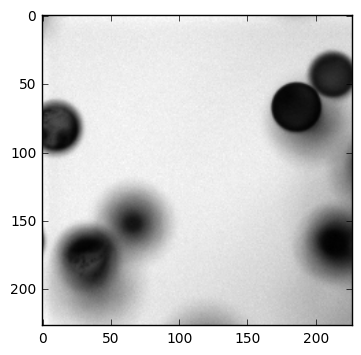

In [2]:
# Implementation of AlexNet architecture. Later to be reconfigured for semantic segmentation

%matplotlib inline

import numpy as np
import os
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import os
from scipy import misc
from skimage import io
from skimage import transform


INPUT_SIZE = 227 # Input image dimensions, the input images are square.
num_labels  =2 #  number of output classes. This is a binary classifier



# DATA

data_path = '/Volumes/Elements/PROJECT_DATA/Basalt_5%/Basalt_125-150_5%_22-07-2016_2'

labels_path = '/Volumes/Elements/PROJECT_DATA/Basalt_5%/labels'




# load one input image to test on
path = '/Users/jonathandonnelly/Desktop'
image= misc.imread(os.path.join(path,'0.bmp'), flatten= 0)

# Crop the image so that it is square. This means that when reshaped it will retain the same aspect ratio
image_crop = image[:,0:1024] # crop the image so that it is square

# Resize the image to fit into the AlexNet
image_resized = transform.resize(image_crop, (227, 227)) 

plt.imshow(image_resized, cmap = 'gray')

# Reshape the image to 4d Tensor before passing it to the placeholder 
image_4d = np.reshape(image_resized, [1,INPUT_SIZE,INPUT_SIZE,1])

image_4d.dtype



In [4]:
# This is the input to the network which consists of the input images and the assosciated labels


with tf.name_scope('Input'):
    x = tf.placeholder(tf.float32, shape = (None,INPUT_SIZE,INPUT_SIZE,1)) # placeholder for the input images
    labels = tf.placeholder(tf.int32, shape = (None,INPUT_SIZE,INPUT_SIZE,1)) # ground truth labelled images
    
    

In [5]:
# First Convolutional Layer with RELu

with tf.name_scope('Conv_1'):
    
    # the Filter_1 variable consists of 96 Filters, each with a width and height of 11 and with 1 channel
    Filters_1 = tf.Variable(tf.random_normal([11, 11, 1, 96], stddev = 0.35), name = 'Filters_1')
    
    Biases_1 = tf.Variable(tf.constant(0.1, shape = [96]), name="Biases_1") 
    
    # The first convolution operation in the network
    conv_1 = tf.nn.relu(tf.nn.conv2d(x, Filters_1, strides = [1,4,4,1], padding = 'VALID')+Biases_1)
    
    
init = tf.global_variables_initializer()   
    
sess = tf.Session()
sess.run(init)
conv1_op = (sess.run(conv_1, feed_dict={x: image_4d}))
print(conv1_op.shape)
print(conv1_op.dtype)

#plt.imshow(sess.run(Kernel_1),cmap = 'gray')# look at the kernel
#sess.run(Kernel_1).shape
#plt.imshow(Kernel_1)

(1, 55, 55, 96)
float32


In [6]:
with tf.name_scope('Norm_1'):
    # Local Response Normalisation applied to the first convolutional layer
    conv_1_norm = tf.nn.local_response_normalization(conv_1, 5, 2, 10**-4, 0.75 )
       
init = tf.global_variables_initializer()   
    
sess = tf.Session()
sess.run(init)
norm1_op = (sess.run(conv_1_norm, feed_dict={x: image_4d}))
print(norm1_op.shape)
print(norm1_op.dtype)

(1, 55, 55, 96)
float32


In [7]:

# First Pooling Layer

with tf.name_scope('Pool_1'):
    Pool_1 = tf.nn.max_pool(conv_1_norm, ksize = [1,3,3,1], strides = [1,2,2,1], padding = 'VALID')
    

init = tf.global_variables_initializer()       
    
sess = tf.Session()
sess.run(init)



pool1_op = (sess.run(Pool_1, feed_dict={x: image_4d}))
print(pool1_op.shape)
print(pool1_op.dtype)

(1, 27, 27, 96)
float32


In [8]:
# Second Convolutional Layer


with tf.name_scope('Conv_2'):
    
    Filters_2 = tf.Variable(tf.random_normal([5, 5, 96, 256], stddev = 0.35), name = 'Kernel2')
   
    Biases_2 = tf.Variable(tf.constant(0.1, shape = [256]), name="Biases_1")
    
    conv_2 = tf.nn.relu(tf.nn.conv2d(Pool_1, Filters_2, strides = [1,1,1,1], padding = 'SAME') + Biases_2)


init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

conv2_op = (sess.run(conv_2, feed_dict={x: image_4d})) # feed in the output from the previous layer
print(conv2_op.shape)    
print(conv2_op.dtype)

(1, 27, 27, 256)
float32


In [9]:
with tf.name_scope('Norm_2'):
    
    conv_2_norm = tf.nn.local_response_normalization(conv_2, 5, 2, 10**-4, 0.75 )
    
    
    
init = tf.global_variables_initializer()      
sess = tf.Session()
sess.run(init)
norm2_op = (sess.run(conv_2_norm, feed_dict={x: image_4d}))
print(norm2_op.shape)
print(norm2_op.dtype)
    

(1, 27, 27, 256)
float32


In [10]:
# Second Pooling Layr

with tf.name_scope('Pool_2'):
     Pool_2 = tf.nn.max_pool(conv_2, ksize = [1,3,3,1], strides = [1,2,2,1], padding = 'VALID')


init = tf.global_variables_initializer()     
sess = tf.Session()
sess.run(init)

Pool2_op = (sess.run(Pool_2, feed_dict={x: image_4d})) # feed in the output from the previous layer
print(Pool2_op.shape) 
print(Pool2_op.dtype) 

(1, 13, 13, 256)
float32


In [11]:
# Third Convolutional Layer
    
with tf.name_scope('Conv_3'):
    Filters_3 = tf.Variable(tf.random_normal([3, 3, 256, 384], stddev = 0.35), name = 'Kernel3')
   
    Biases_3 = tf.Variable(tf.constant(0.1, shape = [384]), name="Biases_3")
    
    conv_3 = tf.nn.relu(tf.nn.conv2d(Pool_2, Filters_3, strides = [1,1,1,1], padding = 'SAME') + Biases_3)
    
init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

conv3_op = (sess.run(conv_3, feed_dict={x: image_4d})) # feed in the output from the previous layer
print(conv3_op.shape)
print(conv3_op.dtype)


(1, 13, 13, 384)
float32


In [12]:
# Fourth Convolutional Layer


with tf.name_scope('Conv_4'):
    Filters_4 = tf.Variable(tf.random_normal([3, 3, 384, 384], stddev = 0.35), name = 'Kernel3')
   
    Biases_4 = tf.Variable(tf.constant(0.1, shape = [384]), name="Biases_4")
    
    conv_4 = tf.nn.relu(tf.nn.conv2d(conv_3, Filters_4, strides = [1,1,1,1], padding = 'SAME')+Biases_4)
    
init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

conv4_op = (sess.run(conv_4, feed_dict={x: image_4d})) # feed in the output from the previous layer
print(conv4_op.shape)
print(conv4_op.dtype)



(1, 13, 13, 384)
float32


In [13]:
# Fifth convolutional Layer

with tf.name_scope('Conv_5'):
    
    Filters_5 = tf.Variable(tf.random_normal([3, 3, 384, 256], stddev = 0.35), name = 'Kernel3')
   
    Biases_5 = tf.Variable(tf.constant(0.1, shape = [256]), name="Biases_5")
    
    conv_5 = tf.nn.relu(tf.nn.conv2d(conv_4, Filters_5, strides = [1,1,1,1], padding = 'SAME')+Biases_5)
    
    
init = tf.global_variables_initializer()   
sess = tf.Session()
sess.run(init)

conv5_op = (sess.run(conv_5, feed_dict={x: image_4d})) # feed in the output from the previous layer
print(conv5_op.shape)
print(conv5_op.dtype)








(1, 13, 13, 256)
float32


In [14]:
# Add another max pooling layer here and then the fully connected layers 



with tf.name_scope('Pool_3'):
    
     Pool_3 = tf.nn.max_pool(conv_5, ksize = [1,3,3,1], strides = [1,2,2,1], padding = 'VALID')


init = tf.global_variables_initializer()   
sess = tf.Session()
sess.run(init)

Pool3_op = (sess.run(Pool_3, feed_dict={x: image_4d})) # feed in the output from the previous layer
print(Pool3_op.shape)
print(Pool3_op.dtype)






(1, 6, 6, 256)
float32


In [15]:
 # First Fully Convolutional layer
    
with tf.name_scope('FConv_1'):
    
    # Fully Convolutional layer

    Filter_FC1 = tf.Variable(tf.random_normal([6, 6, 256, 4096], stddev = 0.35), name = 'Kernel_FC1')
   
    Biases_FC1 = tf.Variable(tf.constant(0.1, shape = [4096]), name="Biases_FC1")
    
    conv_FC1 = tf.nn.relu(tf.nn.conv2d(Pool_3, Filter_FC1, strides = [1,1,1,1], padding = 'VALID'))
    
init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

conv5_op = (sess.run(conv_FC1, feed_dict={x: image_4d})) # feed in the output from the previous layer
print(conv5_op.shape)
print(conv5_op.dtype)






(1, 1, 1, 4096)
float32


In [16]:
 # Second Fully convolutional layer   
    
    
with tf.name_scope('FConv_2'):
    
    # Fully Convolutional layer

    Filter_FC2 = tf.Variable(tf.random_normal([1, 1, 4096, 4096], stddev = 0.35), name = 'Kernel_FC2')
   
    Biases_FC2 = tf.Variable(tf.constant(0.1, shape = [4096]), name="Biases_FC2")
    
    conv_FC2 = tf.nn.relu(tf.nn.conv2d(conv_FC1, Filter_FC2, strides = [1,1,1,1], padding = 'VALID'))
    
    
    
init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

conv5_op = (sess.run(conv_FC2, feed_dict={x: image_4d})) # feed in the output from the previous layer
print(conv5_op.shape)
print(conv5_op.dtype)





(1, 1, 1, 4096)
float32


In [17]:
# Binary clasiifier layer to predict each of the output classes

with tf.name_scope('Binary_layer'):
    
    # Fully Convolutional layer

    Filter_BL = tf.Variable(tf.random_normal([1, 1, 4096, 2], stddev = 0.35), name = 'Kernel_BL')
   
    Biases_BL = tf.Variable(tf.constant(0.1, shape = [4096]), name="Biases_BL")
    
    conv_BL = tf.nn.relu(tf.nn.conv2d(conv_FC2, Filter_BL, strides = [1,1,1,1], padding = 'VALID'))
    
    
    
init = tf.global_variables_initializer()   
sess = tf.Session()
sess.run(init)

conv5_op = (sess.run(conv_BL, feed_dict={x: image_4d})) # feed in the output from the previous layer
print(conv5_op.shape)
print(conv5_op.dtype)





(1, 1, 1, 2)
float32


float32
(1, 227, 227, 2)


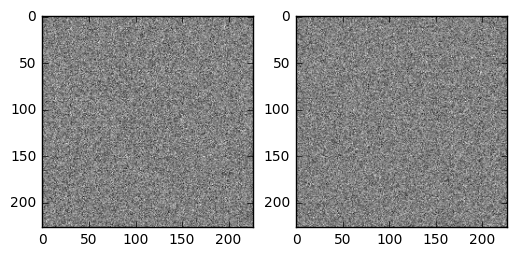

In [18]:
# Upsampling layer


# Upsampling Deconvolution layer. Takes the binary output form the previous layer and upsamples to an image of equal 
# dimensions to the output

output_shape = [1, 227, 227, 2]
strides = [1, 1, 1, 1]


with tf.name_scope('Upsampling_layer'):

    #
    Filter_UP = tf.Variable(tf.random_normal([227, 227, 2, 2], stddev = 0.35), name = 'Kernel_UP')
    
    #Biases_UP = tf.Variable(tf.constant(0.1, shape = [4096]), name="Biases_UP")
    
    conv_up = tf.nn.conv2d_transpose(conv_BL, Filter_UP, output_shape = output_shape, strides = strides, padding='VALID')

    
init = tf.global_variables_initializer()   
sess = tf.Session()
sess.run(init)




#print(w.get_shape)
#print(conv_BL.get_shape)
#print(conv_up.get_shape)

      
      
upsample = (sess.run(conv_up, feed_dict={x: image_4d})) # feed in the output from the previous layer
upsample.shape  

print(upsample.dtype)
print(upsample.shape)


test = np.squeeze(upsample)
#print(tyßpe(test))
#test.get_shape()

plt.subplot(1,2,1)
plt.imshow(test[:,:,0], cmap = 'gray')

plt.subplot(1,2,2)
plt.imshow(test[:,:,1], cmap = 'gray')




(1, 227, 227, 1)


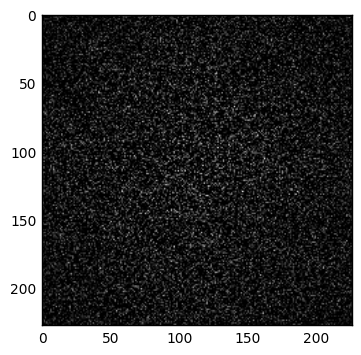

In [42]:
# Another convolutional layer for getting the prediction into the same size as the label image
    # not right!
'''
with tf.name_scope('Prediction'):
    
    # Fully Convolutional layer

    Filter_FINAL = tf.Variable(tf.random_normal([227, 227, 2, 1], stddev = 0.35), name = 'Kernel_FC1')
   
    Biases_FINAL = tf.Variable(tf.constant(0.1, shape = [1]), name="Biases_FC1")
    
    conv_FINAL = tf.nn.relu(tf.nn.conv2d(conv_up, Filter_FINAL, strides = [1,1,1,1], padding = 'SAME'))
    
init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

test = (sess.run(conv_FINAL, feed_dict={x: image_4d})) # feed in the output from the previous layer
print(test.shape)

test = np.squeeze(test)

plt.imshow(test, cmap = 'gray')

'''

In [119]:
# Loss computation I THINK THIS IS WRONG
'''
logits = tf.reshape(conv_FINAL, [-1])

reshaped_labels = tf.reshape(labels, [-1])


cross_entropy = tf.nn.softmax(logits = logits, labels = reshaped_labels)
loss = tf.reduce_mean(cross_entropy)


train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)



init = tf.global_variables_initializer()    
sess = tf.Session()
sess.run(init)

with sess.as_default():
    train_step = train_op.run(feed_dict={x:image_4d,labels:image_4d})
'''

TypeError: softmax() got an unexpected keyword argument 'labels'

In [19]:
# LOSS COMPUTATION 

reshaped_logits = tf.reshape(conv_up, [-1, 2])  # shape [batch_size*227*227, 2]
reshaped_labels = tf.reshape(labels, [-1])  # shape [batch_size*227*227*1]

loss = tf.nn.sparse_softmax_cross_entropy_with_logits(logits = reshaped_logits, labels = reshaped_labels)
cost = tf.reduce_mean(loss)
optimizer = tf.train.AdamOptimizer(learning_rate=0.1).minimize(cost)



init = tf.global_variables_initializer()   
sess = tf.InteractiveSession()
sess.run(init)

log = sess.run(reshaped_logits, feed_dict = {x:image_4d})

log.shape


(51529, 2)

In [24]:
epochs = 100

# feed the imges and labels in and this might work
init = tf.global_variables_initializer()   
sess = tf.InteractiveSession()
sess.run(init)
for i in range(epochs):
    
    op = sess.run(optimizer, feed_dict={x:image_4d,labels:label_4d})
            
    if epochs % 5 == 0:
        print("Epoch: ", i)

print("done")

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

In [43]:
for i in range(training_epochs):
    batch_x, batch_y = mnist.train.next_batch(batch_size)

# perform the operations we defined earlier on batch
    _, summary = sess.run([train_op, summary_op], feed_dict={x: batch_x, y_: batch_y})
            
            # write log
            writer.add_summary(summary, epoch * batch_count + i)

        if epoch % 5 == 0:
            print("Epoch: ", epoch)
    print("Accuracy: ", accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}))
    print("done")

IndentationError: unexpected indent (<ipython-input-43-d63b1be4ecfd>, line 24)

In [48]:
logits = tf.reshape(conv_FINAL, [-1])

init = tf.global_variables_initializer()   
sess = tf.InteractiveSession()
sess.run(init)

logit_test = (sess.run(logits, feed_dict={x: image_4d}))
logit_test.shape




(51529,)

In [106]:
from skimage import transform as tran

path = '/Users/jonathandonnelly/Desktop/PROJECT_DATA/Basalt_5%/TEST_IMAGES/Raw'
image= misc.imread(os.path.join(path,'0.bmp'), flatten= 0)
image_crop = image[:,0:1024]
plt.imshow(image_crop, cmap = 'gray')
image_resize = tran.resize(image_crop, (227, 227))
image_resize.shape
plt.imshow(image_resize, cmap = 'gray')


FileNotFoundError: [Errno 2] No such file or directory: '/Users/jonathandonnelly/Desktop/PROJECT_DATA/Basalt_5%/TEST_IMAGES/Raw/0.bmp'

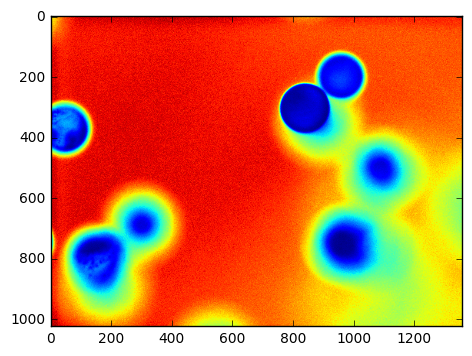

In [60]:
plt.imshow(image)

In [68]:
INPUTS = tf.float32(1,INPUT_SIZE,INPUT_SIZE,1)



TypeError: 'DType' object is not callable

(1024, 1360)

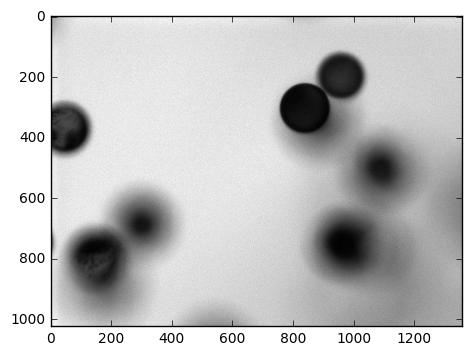

In [36]:
plt.imshow(image[:,:],cmap="gray")
image.shape

(3, 8, 8, 128)


In [61]:
output = tf.constant(0.1, shape=output_shape)
expected_l = tf.nn.conv2d(output, w, strides=strides, padding='SAME')
print(expected_l.get_shape())

(3, 4, 4, 4)


In [21]:
# Reading data from disk to feed into the graph
import os
import PIL

data_strings = os.listdir('/Volumes/Elements/PROJECT_DATA/Basalt_5%/Basalt_125-150_5%_22-07-2016_2/')
label_strings = os.listdir('/Volumes/Elements/PROJECT_DATA/Basalt_5%/labels/')

#data_queue = tf.train.string_input_producer(data_files)
#label_queue = tf.train.string_input_producer(label_files)

#reader = tf.WholeFileReader()

#key, value = reader.read(data_queue)

# File paths
data_path = '/Volumes/Elements/PROJECT_DATA/Basalt_5%/Basalt_125-150_5%_22-07-2016_2/'

labels_path = '/Volumes/Elements/PROJECT_DATA/Basalt_5%/labels/'


# Read image and rescale
img = PIL.Image.open(data_path + data_strings[0])
label = PIL.Image.open(labels_path + label_strings[2])

# This converts the .bmp files into numpy arrays
img = np.array(img)
label = np.array(label)


# Ah the lengths of the arrays are diiferetn, need more preprocessing
print(len(data_strings)) # Filter out the original data which is too blurry!!
print(len(label_strings))

4760
3297


Range of image values
0.691497
0.0298212
Range of label values
0
1
float32


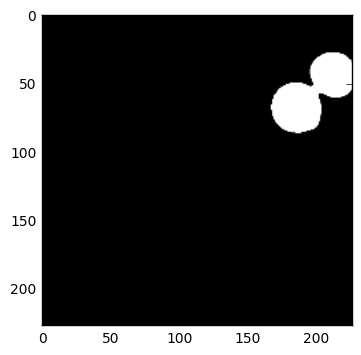

In [22]:
# crop the images and the labels

img_crop = img[:,0:1024] 
label_crop = label[:,0:1024]

# scale the images and labels down to fit into the network 
img_resized = transform.resize(img_crop, (227, 227)) 
label_resized = transform.resize(label_crop, (227, 227))

img_resized.shape



img_4d = np.float32(np.reshape(img_resized, [1,INPUT_SIZE,INPUT_SIZE,1]))
label_4d = np.int32(np.reshape(label_resized, [1,INPUT_SIZE,INPUT_SIZE,1]))


plt.imshow(img_resized, cmap='gray')
plt.imshow(label_resized, cmap ='gray')

#img_4d = tf.float32(img_4d)
#label_4d = tf.float32(label_4d)

print('Range of image values')
print(np.max(img_4d)) # range of inputs
print(np.min(img_4d)) 

print('Range of label values')
print(np.min(label_4d))
print(np.max(label_4d))


print(img_4d.dtype)

In [173]:
img_4d.dtype

dtype('float32')